<a href="https://colab.research.google.com/github/Anmolcool/CNN/blob/main/Pooling_and_Data_Augmentation_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

# Data Augmentaion Concept

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator # Data Augmentation package
from keras.utils import img_to_array, array_to_img, load_img

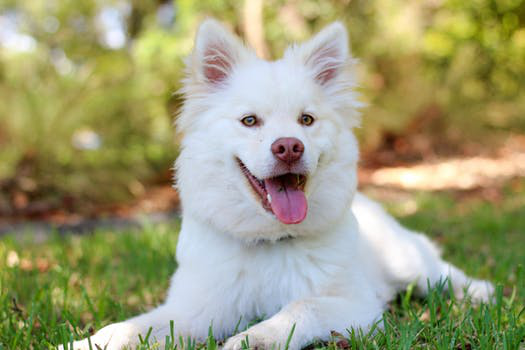

In [ ]:
# Load an image for data augmentation
image_file = '/content/dog.jpeg'
dog_image = tf.keras.preprocessing.image.load_img(image_file)
dog_array = tf.keras.preprocessing.image.img_to_array(dog_image)
dog = dog_array.reshape((1,)+ dog_array.shape)

# inspect the image
dog_image

In [ ]:
dog_array

array([[[177., 182., 116.],
        [176., 181., 115.],
        [173., 178., 111.],
        ...,
        [107., 112.,  12.],
        [ 97., 102.,   2.],
        [ 95.,  97.,   0.]],

       [[178., 183., 119.],
        [176., 181., 115.],
        [174., 179., 113.],
        ...,
        [101., 105.,   8.],
        [ 94.,  96.,   0.],
        [ 91.,  92.,   0.]],

       [[177., 182., 118.],
        [175., 180., 116.],
        [173., 178., 112.],
        ...,
        [ 93.,  97.,   2.],
        [ 88.,  89.,   0.],
        [ 86.,  86.,   0.]],

       ...,

       [[ 68., 114.,  75.],
        [ 67., 110.,  65.],
        [ 69., 106.,  54.],
        ...,
        [111., 127.,  91.],
        [102., 123.,  80.],
        [101., 128.,  77.]],

       [[ 66., 117.,  74.],
        [ 60., 108.,  60.],
        [ 61., 102.,  46.],
        ...,
        [130., 143., 115.],
        [140., 156., 120.],
        [148., 164., 125.]],

       [[ 59., 117.,  69.],
        [ 60., 113.,  59.],
        [ 66., 1

In [ ]:
dog_array.shape

(350, 525, 3)

In [ ]:
def plot_images(original_image, updated_image):
  plt.figure(figsize=(15,8))
  # Original image
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(original_image)

  # Transformed Image
  plt.subplot(1,2,2)
  plt.title("Transformed Image")
  plt.imshow(updated_image)

  plt.show()

# Filp an Image

In [ ]:
transformed_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [ ]:
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

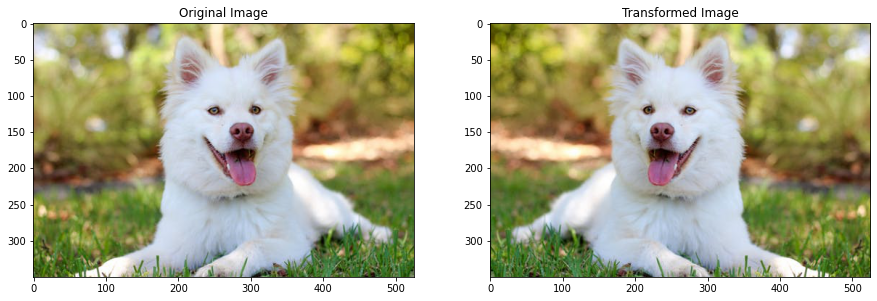

In [ ]:
plot_images(dog_image, transformed_image)

# Shifting image

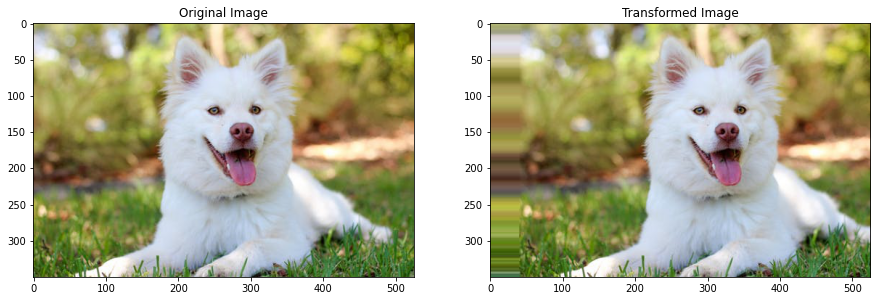

In [ ]:
# height_shift_range=0.0
transformed_fn = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=50)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

# Rotating image

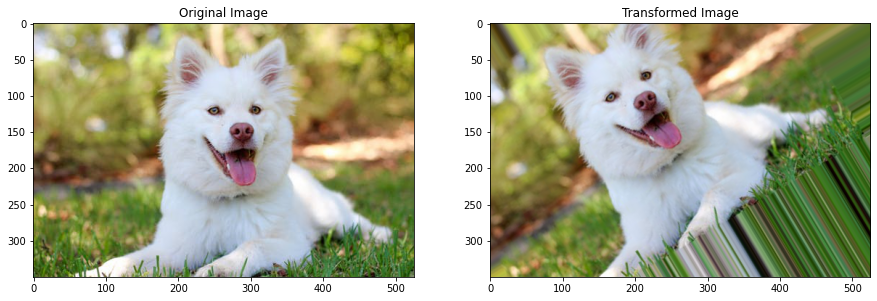

In [ ]:
# rotation_range=0
transformed_fn = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=100)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

# Zoom

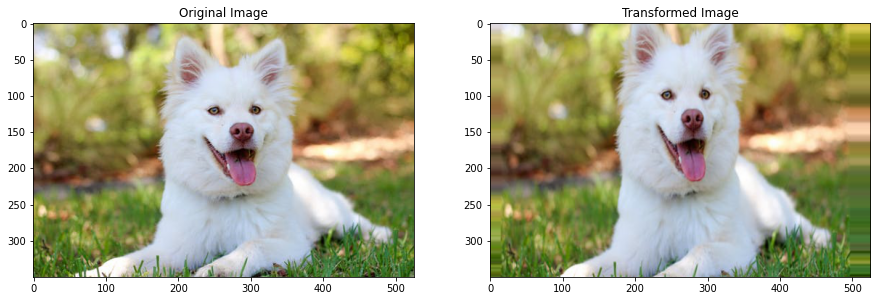

In [ ]:
transformed_fn = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[1.5, 0.0])
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

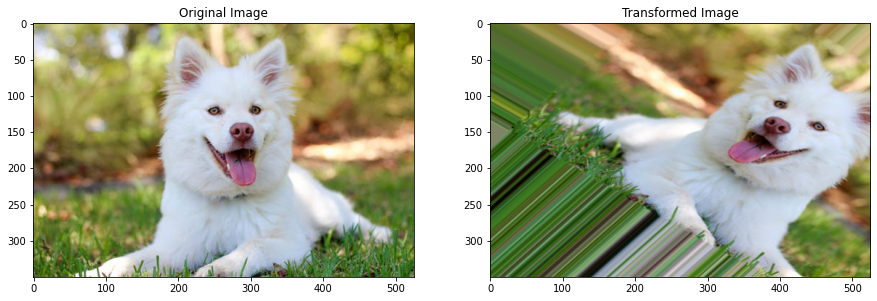

In [ ]:
transformed_fn = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.5,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255 ,
   )

transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

In [ ]:
directory = '/content/sample_data'

i =0

for batch in transformed_fn.flow(dog, batch_size=1, save_to_dir = directory, save_prefix='dog_image', save_format='jpeg'):
  i +=1
  if i >25:
    break